In [27]:
import pandas as pd
df = pd.read_csv("bank_transactions_data.csv")
df.head()


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [28]:
from sklearn.impute import SimpleImputer

num_cols = ["TransactionAmount", "TransactionDuration", "AccountBalance"]
imputer_num = SimpleImputer(strategy="mean")
df[num_cols] = imputer_num.fit_transform(df[num_cols])

In [29]:
df_encoded = pd.get_dummies(
    df,
    columns=["TransactionType", "Location", "Channel", "CustomerOccupation"],
    drop_first=True
)

In [33]:
from sklearn.model_selection import train_test_split

# Identify non-numeric columns that need to be dropped or encoded
# The variable 'non_numeric_cols_to_drop' is available in the kernel state.
# We also drop 'TransactionID' as it's a unique identifier and not a feature for the model.
cols_to_drop = ["TransactionID"] + non_numeric_cols_to_drop

X = df_encoded.drop(columns=cols_to_drop, errors='ignore')
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [34]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(n_estimators=200, contamination=0.02, random_state=42)
model.fit(X_train)

df["anomaly_score"] = model.decision_function(X)
df["is_fraud"] = model.predict(X)

/tmp/ipython-input-547815129.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraudulent_transactions, x='TransactionType', palette='viridis')


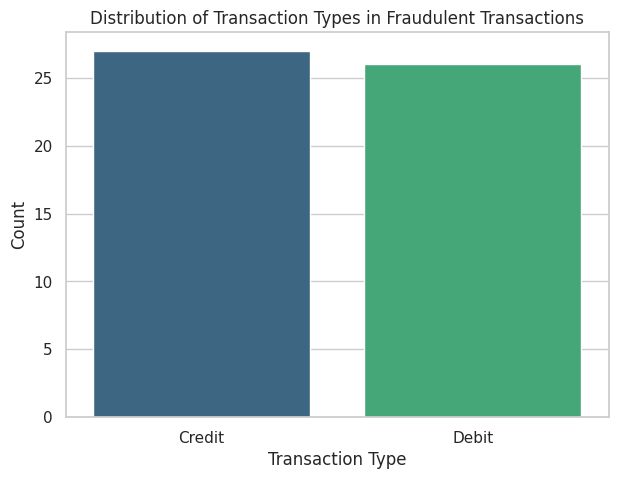

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Plot for TransactionType
plt.figure(figsize=(7, 5))
sns.countplot(data=fraudulent_transactions, x='TransactionType', palette='viridis')
plt.title('Distribution of Transaction Types in Fraudulent Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-36919769.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraudulent_transactions, x='Channel', palette='magma')


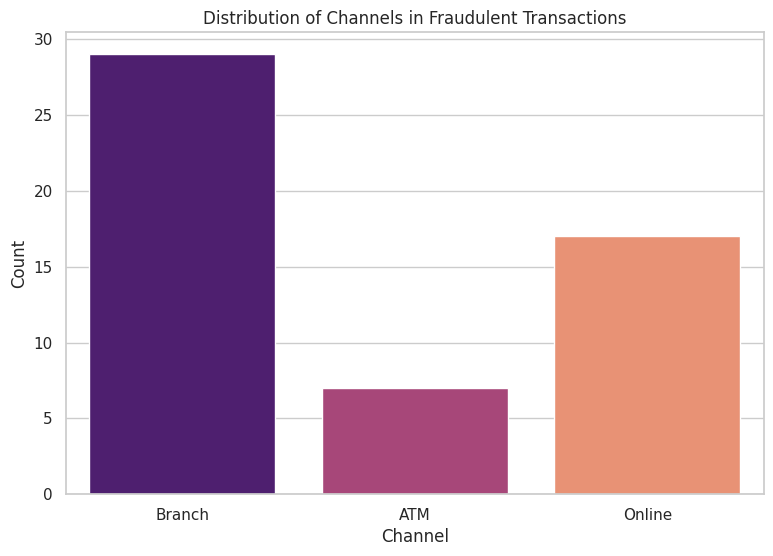

In [38]:
# Plot for Channel
plt.figure(figsize=(9, 6))
sns.countplot(data=fraudulent_transactions, x='Channel', palette='magma')
plt.title('Distribution of Channels in Fraudulent Transactions')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-2980524942.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraudulent_transactions, y='CustomerOccupation', order=fraudulent_transactions['CustomerOccupation'].value_counts().head(5).index, palette='cividis')


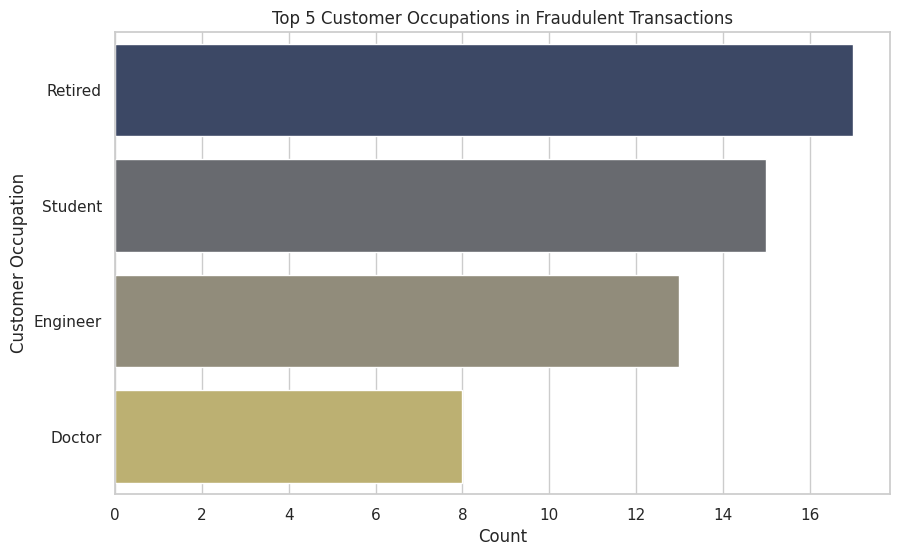

In [39]:
# Plot for top 5 Customer Occupations
plt.figure(figsize=(10, 6))
sns.countplot(data=fraudulent_transactions, y='CustomerOccupation', order=fraudulent_transactions['CustomerOccupation'].value_counts().head(5).index, palette='cividis')
plt.title('Top 5 Customer Occupations in Fraudulent Transactions')
plt.xlabel('Count')
plt.ylabel('Customer Occupation')
plt.show()

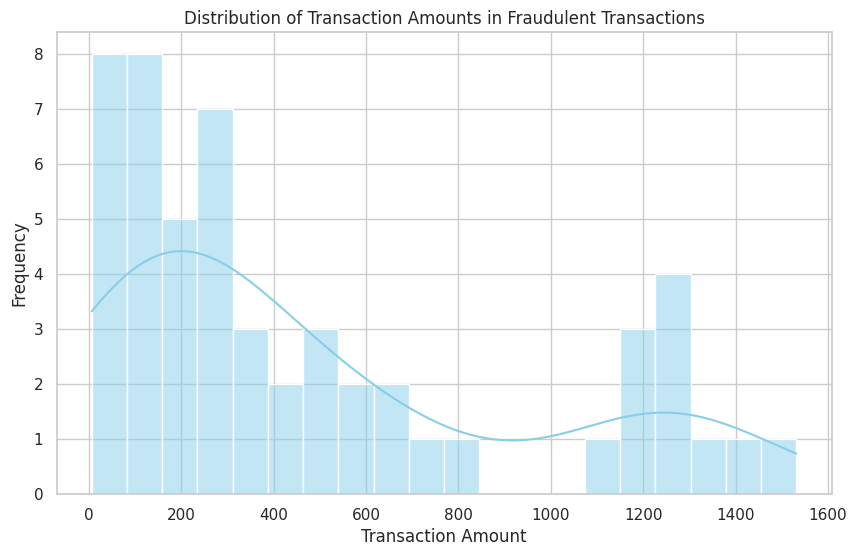

In [40]:
# Histogram for TransactionAmount
plt.figure(figsize=(10, 6))
sns.histplot(fraudulent_transactions['TransactionAmount'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Transaction Amounts in Fraudulent Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

In [36]:
print("\nDescriptive statistics for fraudulent transactions (numerical features):\n")
display(fraudulent_transactions.describe())

print("\nValue counts for TransactionType in fraudulent transactions:\n")
display(fraudulent_transactions['TransactionType'].value_counts())

print("\nValue counts for Channel in fraudulent transactions:\n")
display(fraudulent_transactions['Channel'].value_counts())

print("\nValue counts for CustomerOccupation in fraudulent transactions:\n")
display(fraudulent_transactions['CustomerOccupation'].value_counts().head())


Descriptive statistics for fraudulent transactions (numerical features):



,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,anomaly_score,is_fraud
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.0
mean,480.826604,43.905660,137.622642,3.716981,4627.206792,-0.012067,-1.0
std,453.903062,19.115302,85.634560,1.609794,4293.236221,0.009526,0.0
min,6.300000,18.000000,12.000000,1.000000,319.040000,-0.038331,-1.0
25%,142.190000,26.000000,77.000000,3.000000,859.860000,-0.019629,-1.0
50%,303.970000,44.000000,125.000000,4.000000,2796.240000,-0.008347,-1.0
75%,668.670000,60.000000,174.000000,5.000000,7816.410000,-0.004386,-1.0
max,1531.310000,80.000000,297.000000,5.000000,13704.920000,-0.000027,-1.0



Value counts for TransactionType in fraudulent transactions:



,count
TransactionType,
Credit,27
Debit,26



Value counts for Channel in fraudulent transactions:



,count
Channel,
Branch,29
Online,17
ATM,7



Value counts for CustomerOccupation in fraudulent transactions:



,count
CustomerOccupation,
Retired,17
Student,15
Engineer,13
Doctor,8


In [35]:
fraudulent_transactions = df[df['is_fraud'] == -1]
display(fraudulent_transactions.head())

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,anomaly_score,is_fraud
7,TX000008,AC00069,171.42,2023-05-08 17:47:59,Credit,Indianapolis,D000500,92.214.76.157,M020,Branch,67,Retired,291.0,1,2796.24,2024-11-04 08:10:55,-0.002219,-1
26,TX000027,AC00441,246.93,2023-04-17 16:37:01,Debit,Miami,D000046,55.154.161.250,M029,ATM,23,Student,158.0,5,673.35,2024-11-04 08:11:38,-0.014306,-1
74,TX000075,AC00265,1212.51,2023-10-04 16:36:29,Debit,Indianapolis,D000231,193.83.0.183,M036,Branch,20,Student,24.0,1,605.95,2024-11-04 08:06:51,-0.003550,-1
85,TX000086,AC00098,1340.19,2023-09-29 17:22:10,Credit,Austin,D000574,165.114.224.47,M012,Online,54,Engineer,30.0,1,8654.28,2024-11-04 08:06:53,-0.000554,-1
147,TX000148,AC00161,514.95,2023-04-13 18:37:48,Debit,New York,D000109,23.92.205.75,M056,Online,41,Doctor,142.0,5,421.93,2024-11-04 08:10:01,-0.013593,-1
